In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import os

In [2]:
def disk_usage(dir):
    sizes_kb = {}
    print('Models sizes : ')
    for _,_,filenames in os.walk(dir):
        #print(filenames)
        for file in sorted(filenames):
            print(file, ':', os.stat(os.path.join(dir,file)).st_size/1000, 'kb')
            sizes_kb[file] = os.stat(os.path.join(dir,file)).st_size/1000
    return sizes_kb

In [3]:
model_dir = './mnist_models/'
lite_dir = './mnist_tflite_models/'

models_size = disk_usage(model_dir)
litemodels_size = disk_usage(lite_dir)

Models sizes : 
CNN_classic.h5 : 271.416 kb
FFNN_classic.h5 : 3790.408 kb
Models sizes : 
CNN_mnist_model.tflite : 84.356 kb
CNN_mnist_model_quant.tflite : 23.76 kb
CNN_mnist_model_quant16.tflite : 44.256 kb
CNN_mnist_model_quant8.tflite : 24.136 kb
FFNN_mnist_model.tflite : 1259.028 kb
FFNN_mnist_model_quant.tflite : 318.576 kb
FFNN_mnist_model_quant16.tflite : 632.48 kb
FFNN_mnist_model_quant8.tflite : 318.744 kb


In [4]:
list_sizes_cls = list(models_size.values())
list_sizes_tfl = list(litemodels_size.values())
list_sizes = list_sizes_tfl + list_sizes_cls

## First Mac dataset

In [5]:
data_mac = pd.read_csv('RPI_inferences_loop_5.csv')

In [6]:
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = data_mac.columns[ind]
data_mac.rename(columns=dict(zip(old_names, names)),inplace=True)

In [7]:
y = [i for i in range(0,10,1)]
data_mac.loc['mean'] = data_mac.mean()

In [8]:
data_mac

,cnn_converted,cnn_quant,cnn_quant16,cnn_quant8,ffnn_converted,ffnn_quant,ffnn_quant16,ffnn_quant8,cnn,ffnn_mod
0,4.620,4.630,4.610,3.230,8.660,5.450,8.870,13.36,3.800,7.500
1,4.640,4.620,4.610,3.240,8.660,5.440,8.860,13.38,3.250,6.830
2,4.610,4.620,4.620,3.240,8.680,5.440,8.880,13.39,3.300,6.800
3,4.620,4.620,4.610,3.240,8.660,5.460,8.980,13.39,3.270,6.850
4,4.620,4.620,4.620,3.230,8.680,5.440,8.970,13.38,3.270,6.790
mean,4.622,4.622,4.614,3.236,8.668,5.446,8.912,13.38,3.378,6.954


In [9]:
columns = list(data_mac.columns)
means = list(data_mac.iloc[5])

<BarContainer object of 10 artists>

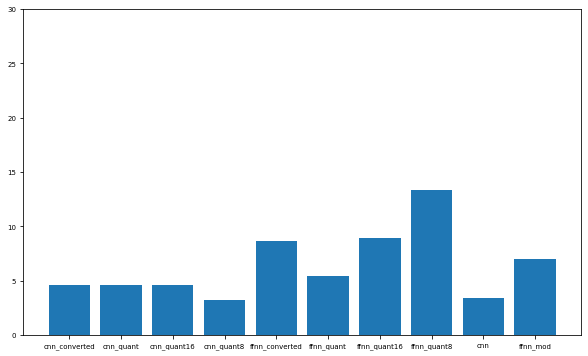

In [10]:
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
colors = plt.cm.Greens(means)
plt.ylim([0,30])
plt.bar(columns, means)

## RPI dataset

In [11]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd
import numpy as np

data_rpi = pd.read_csv('RPI_inferences_loop_10rpi.csv')
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = data_rpi.columns[ind]
data_rpi.rename(columns=dict(zip(old_names, names)),inplace=True)
y = [i for i in range(0,10,1)]
data_rpi.loc['mean'] = data_rpi.mean()

In [12]:
data_rpi

,cnn_converted,cnn_quant,cnn_quant16,cnn_quant8,ffnn_converted,ffnn_quant,ffnn_quant16,ffnn_quant8,cnn,ffnn
0,4.630,4.630,4.620,3.240,8.960,5.540,9.250,13.360,3.770,7.270
1,4.630,4.630,4.620,3.300,8.970,5.450,9.190,13.370,3.260,6.860
2,4.620,4.630,4.610,3.240,8.960,5.440,9.140,13.470,3.300,6.780
3,4.620,4.630,4.610,3.230,9.050,5.430,9.050,13.390,3.270,6.880
4,4.690,4.630,4.610,3.240,8.970,5.460,9.000,13.410,3.280,6.830
5,4.630,4.620,4.600,3.230,8.970,5.430,8.970,13.380,3.280,6.790
6,4.630,4.630,4.610,3.240,8.960,5.420,9.040,13.380,3.520,6.860
7,4.620,4.690,4.610,3.240,8.970,5.450,9.090,13.390,3.270,6.890
8,4.630,4.620,4.610,3.240,8.970,5.440,9.130,13.380,3.240,6.520
9,4.620,4.630,4.610,3.230,8.970,5.430,9.110,13.380,3.300,6.470


<BarContainer object of 10 artists>

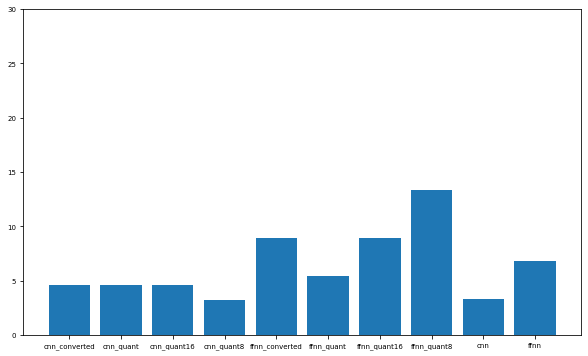

In [13]:
columns = list(data_rpi.columns)
means = list(data_rpi.iloc[5])
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
#colors = plt.cm.Greens(np.linspace(0, 0.5, len(means)))
plt.ylim([0,30])
plt.bar(columns, means)

In [14]:
means

[4.63, 4.62, 4.6, 3.23, 8.97, 5.43, 8.97, 13.38, 3.28, 6.79]

<BarContainer object of 10 artists>

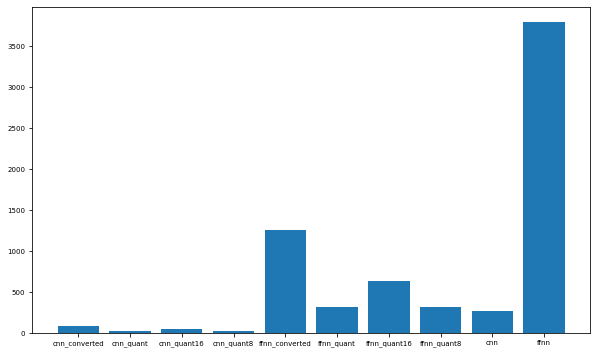

In [30]:
plt.figure(figsize=(10,6))
plt.bar(columns, list_sizes)

In [16]:
import pickle
with open('./disk_rpi.pkl', 'rb') as f:
    rpi_disk_usage = pickle.load(f)

In [17]:
rpi_disk_usage == list_sizes

True

In [18]:
rpi_disk_usage

[84.356,
 23.76,
 44.256,
 24.136,
 1259.028,
 318.576,
 632.48,
 318.744,
 271.416,
 3790.408]

## Cifar100 dataset
### Mac

In [19]:
cifar_model_dir = './cifar100_models/'
cifar_lite_dir = './cifar100_tflite_models/'

models_size = disk_usage(cifar_model_dir)
litemodels_size = disk_usage(cifar_lite_dir)

Models sizes : 
CNN_classic.h5 : 3273.008 kb
FFNN_classic.h5 : 49182.12 kb
Models sizes : 
CNN_cifar100_model.tflite : 1083.476 kb
CNN_cifar100_model_quant.tflite : 273.648 kb
CNN_cifar100_model_quant16.tflite : 543.28 kb
CNN_cifar100_model_quant8.tflite : 273.416 kb
FFNN_cifar100_model.tflite : 16388.388 kb
FFNN_cifar100_model_quant.tflite : 4100.688 kb
FFNN_cifar100_model_quant16.tflite : 8196.688 kb
FFNN_cifar100_model_quant8.tflite : 4100.648 kb


In [20]:
list_sizes_cls = list(models_size.values())
list_sizes_tfl = list(litemodels_size.values())
list_sizes_cifar = list_sizes_tfl + list_sizes_cls

In [21]:
list_sizes_cifar

[1083.476,
 273.648,
 543.28,
 273.416,
 16388.388,
 4100.688,
 8196.688,
 4100.648,
 3273.008,
 49182.12]

In [22]:
cifar_data_mac = pd.read_csv('RPI_inferences_loop_5cifarmac.csv')
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = cifar_data_mac.columns[ind]
cifar_data_mac.rename(columns=dict(zip(old_names, names)),inplace=True)
y = [i for i in range(0,10,1)]
cifar_data_mac.loc['mean'] = cifar_data_mac.mean()

<BarContainer object of 10 artists>

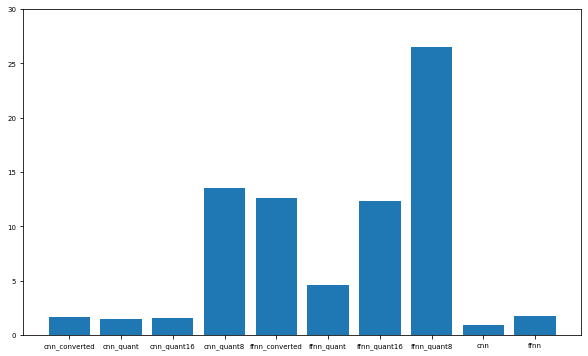

In [23]:
columns = list(cifar_data_mac.columns)
means = list(cifar_data_mac.iloc[5])
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
#colors = plt.cm.Greens(np.linspace(0, 0.5, len(means)))
plt.ylim([0,30])
plt.bar(columns, means)

<BarContainer object of 10 artists>

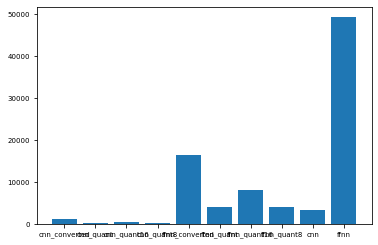

In [24]:
plt.bar(columns, list_sizes_cifar)

(0.0, 50000.0)

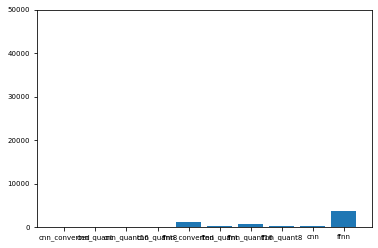

In [25]:
plt.bar(columns, list_sizes)
plt.ylim([0,50000])

### Rpi

<BarContainer object of 10 artists>

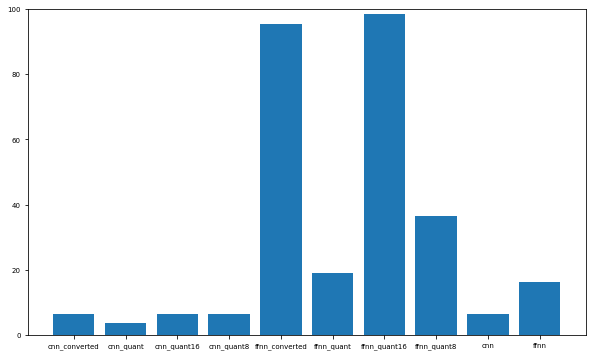

In [26]:
cifar100_data_rpi = pd.read_csv('RPI_inferences_cifar5rpi100.csv')
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = cifar100_data_rpi.columns[ind]
cifar100_data_rpi.rename(columns=dict(zip(old_names, names)),inplace=True)
y = [i for i in range(0,10,1)]
cifar100_data_rpi.loc['mean'] = cifar100_data_rpi.mean()

columns = list(cifar100_data_rpi.columns)
means = list(cifar100_data_rpi.iloc[5])
mpl.rcParams['font.size'] = 7 # font
mpl.rcParams['lines.linewidth'] = 1 # line width
plt.figure(figsize=(10,6))
#colors = plt.cm.Greens(np.linspace(0, 0.5, len(means)))
plt.ylim([0,100]) # !!! 
plt.bar(columns, means)

## CIFAR10 Dataset

### Mac

23.290000000000003

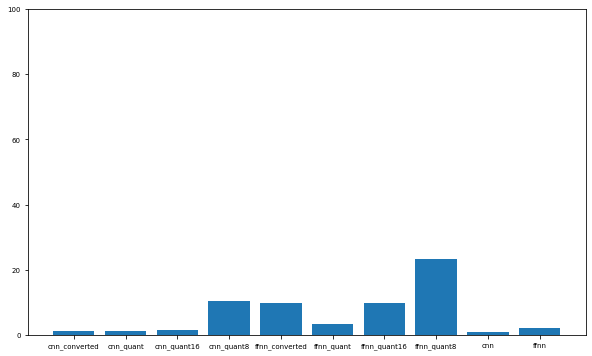

In [27]:
cifar10_data_mac = pd.read_csv('RPI_inferences_cifar3mac10.csv')
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = cifar10_data_mac.columns[ind]
cifar10_data_mac.rename(columns=dict(zip(old_names, names)),inplace=True)
y = [i for i in range(0,10,1)]
cifar10_data_mac.loc['mean'] = cifar10_data_mac.mean()

columns = list(cifar10_data_mac.columns)
means = list(cifar10_data_mac.iloc[3])
plt.figure(figsize=(10,6))
#colors = plt.cm.Greens(np.linspace(0, 0.5, len(means)))
plt.ylim([0,100]) # !!! 
plt.bar(columns, means)
max(means)

### Rpi

76.92

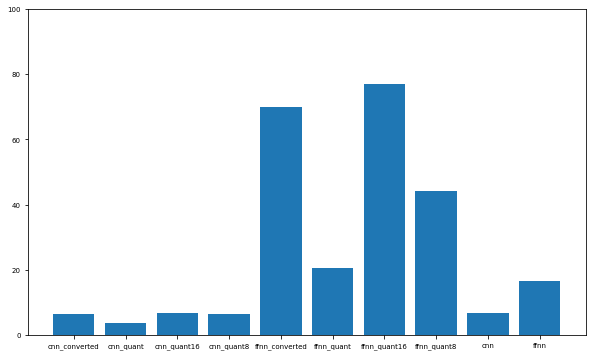

In [28]:
cifar10_data_rpi = pd.read_csv('RPI_inferences_cifar5rpi10.csv')
names = ['cnn_converted', 'cnn_quant', 'cnn_quant16', 'cnn_quant8', 'ffnn_converted', 'ffnn_quant', 'ffnn_quant16', 'ffnn_quant8']
ind = [0,1,2,3,4,5,6,7]
old_names = cifar10_data_rpi.columns[ind]
cifar10_data_rpi.rename(columns=dict(zip(old_names, names)),inplace=True)
y = [i for i in range(0,10,1)]
cifar10_data_rpi.loc['mean'] = cifar10_data_rpi.mean()

columns = list(cifar10_data_rpi.columns)
means = list(cifar10_data_rpi.iloc[3])
plt.figure(figsize=(10,6))
#colors = plt.cm.Greens(np.linspace(0, 0.5, len(means)))
plt.ylim([0,100]) # !!! 
plt.bar(columns, means)
max(means)